In [ ]:
JSON <- its a source like dictionary 

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url="https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json"
req=requests.get(url)

In [3]:
req

<Response [200]>

In [4]:
soup=BeautifulSoup(req.content)

In [5]:
soup   #<- You can also make dataframe from this library as well but it will be hard to change this dictionary data into dataframe at this way

{ "_id" : { "$oid" : "50b59cd75bed76f46522c34e" }, "student_id" : 0, "class_id" : 2, "scores" : [ { "type" : "exam", "score" : 57.92947112575566 }, { "type" : "quiz", "score" : 21.24542588206755 }, { "type" : "homework", "score" : 68.19567810587429 }, { "type" : "homework", "score" : 67.95019716560351 }, { "type" : "homework", "score" : 18.81037253352722 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c34f" }, "student_id" : 0, "class_id" : 28, "scores" : [ { "type" : "exam", "score" : 39.17749400402234 }, { "type" : "quiz", "score" : 78.44172815491468 }, { "type" : "homework", "score" : 20.81782269075502 }, { "type" : "homework", "score" : 70.44520452408949 }, { "type" : "homework", "score" : 50.66616327819226 }, { "type" : "homework", "score" : 53.84983118363991 } ] }
{ "_id" : { "$oid" : "50b59cd75bed76f46522c350" }, "student_id" : 0, "class_id" : 5, "scores" : [ { "type" : "exam", "score" : 88.22950674232497 }, { "type" : "quiz", "score" : 79.28962650427184 }, { "type" : "homework"

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re   #<- Remember that re is a module not library

In [7]:
df=pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json")  #<-It gives an error trailing data bcoz panda will take all the line inside the json as one line. It will not give new row to the next line.

ValueError: Trailing data

In [221]:
df=pd.read_json("https://raw.githubusercontent.com/ozlerhakan/mongodb-json-files/master/datasets/grades.json",lines=True)   #<- Now, it will be work bcoz we gane new lines for every new starting in json by using lines=True function

In [46]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [12]:
df.info()   #<- This info function will give data type of every columns and also it shows that if any null value is present in column or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         280 non-null    object
 1   student_id  280 non-null    int64 
 2   class_id    280 non-null    int64 
 3   scores      280 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [13]:
df

,_id,student_id,class_id,scores
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [18]:
str(df["_id"][0])

"{'$oid': '50b59cd75bed76f46522c34e'}"

In [35]:
re.sub("^.*: \'|'}","",str(df["_id"][0]))

'50b59cd75bed76f46522c34e'

In [222]:
# 1st Method
for i in range(len(df["_id"])):
    df["_id"][i]=re.sub("^.*: \'|'}","",str(df["_id"][i]))

<ipython-input-222-7a90097f77d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["_id"][i]=re.sub("^.*: \'|'}","",str(df["_id"][i]))


In [15]:
df[id]

KeyError: 2036555106816

In [139]:
df["_id"]

0      50b59cd75bed76f46522c34e
1      50b59cd75bed76f46522c34f
2      50b59cd75bed76f46522c350
3      50b59cd75bed76f46522c351
4      50b59cd75bed76f46522c352
                 ...           
275    50b59cd75bed76f46522c461
276    50b59cd75bed76f46522c462
277    50b59cd75bed76f46522c463
278    50b59cd75bed76f46522c464
279    50b59cd75bed76f46522c465
Name: _id, Length: 280, dtype: object

In [155]:
df

,_id,student_id,class_id,scores
0,50b59cd75bed76f46522c34e,0,2,"[{'type': 'exam', 'score': 57.92947112575566},..."
1,50b59cd75bed76f46522c34f,0,28,"[{'type': 'exam', 'score': 39.17749400402234},..."
2,50b59cd75bed76f46522c350,0,5,"[{'type': 'exam', 'score': 88.22950674232497},..."
3,50b59cd75bed76f46522c351,0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ..."
4,50b59cd75bed76f46522c352,0,24,"[{'type': 'exam', 'score': 4.444435759027499},..."
...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,"[{'type': 'exam', 'score': 19.75901367795435},..."
276,50b59cd75bed76f46522c462,48,14,"[{'type': 'exam', 'score': 66.79008851052096},..."
277,50b59cd75bed76f46522c463,48,8,"[{'type': 'exam', 'score': 87.50309579619501},..."
278,50b59cd75bed76f46522c464,48,15,"[{'type': 'exam', 'score': 17.49112864462374},..."


In [52]:
df.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [ ]:
3 columns -> exam_score,quiz_score,homework_score
._ _
Final output -> id,student_id,class id,exam_score,quiz_score,homework_score
homework_score <- mean of its 3 values

In [85]:
df.scores[0][0]  #<- It will give you exam value

{'type': 'exam', 'score': 57.92947112575566}

In [86]:
df.scores[0][1]  #<- It will give you quiz value

{'type': 'quiz', 'score': 21.24542588206755}

In [87]:
str(df["scores"][0])

"[{'type': 'exam', 'score': 57.92947112575566}, {'type': 'quiz', 'score': 21.24542588206755}, {'type': 'homework', 'score': 68.1956781058743}, {'type': 'homework', 'score': 67.95019716560351}, {'type': 'homework', 'score': 18.81037253352722}]"

In [184]:
df.scores[4]

[{'type': 'exam', 'score': 4.444435759027499},
 {'type': 'quiz', 'score': 28.63057857803885},
 {'type': 'homework', 'score': 86.79352850434199},
 {'type': 'homework', 'score': 83.9164548767836}]

In [144]:
exam_score=[]
quiz_score=[]
homework_score=[]
for i in range(len(df.scores)):
    exam_score.append(round(df.scores[i][0]['score'],2))
    quiz_score.append(round(df.scores[i][1]['score'],2))
#     a=df.scores[i][2]["score"]   #<- This method will not work, bcoz some has 2 values in homework and some has 3 values
#     b=df.scores[i][3]["score"]
#     c=df.scores[i][4]["score"]
#     homework_score.append(round((a+b+c)/3,2))

In [167]:
df['scores'][0][2:]

[{'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [257]:
re.findall('\d*.\d+',str(df['scores'][0][2:]))

In [225]:
a=[]
for i in range(len(df['scores'])):
    a.append(re.findall('\d+.\d+',str(df['scores'][i][2:])))

In [201]:
a

[['68.1956781058743', '67.95019716560351', '18.81037253352722'],
 ['20.81782269075502',
  '70.44520452408949',
  '50.66616327819226',
  '53.84983118363991'],
 ['18.66254946562674',
  '40.28154176513361',
  '1.23735944117882',
  '88.96101200683958'],
 ['6.48470951607214', '68.33519637418685', '78.53068038180965'],
 ['86.79352850434199', '83.9164548767836'],
 ['83.42772189120254', '49.86812935368258', '39.85525554437086'],
 ['75.62999921143397', '72.41228797373115', '74.06744381708968'],
 ['59.58797547174019',
  '67.42173915928456',
  '71.25502554312342',
  '94.46662737566072'],
 ['82.80835343023551'],
 ['18.05861540807023', '80.04086698967356'],
 ['55.6752702814148', '63.15391302252755'],
 ['34.6879008789745'],
 ['22.17993073237026', '33.7647119689925', '18.29543263797219'],
 ['68.81640554493546', '87.88279757549473', '83.36858109902629'],
 ['91.50521146788955', '82.1425639828968', '16.64633943981927'],
 ['43.10650652263911', '56.89478543605922'],
 ['76.7208591903267', '41.1446142039094

In [212]:
a[1]

['20.81782269075502',
 '70.44520452408949',
 '50.66616327819226',
 '53.84983118363991']

In [204]:
len(a[0])

3

In [206]:
a[0][0]

'68.1956781058743'

In [229]:
#1st method
homework_score=[]
for i in range(len(a)):
    sum=0
    for j in range(len(a[i])):
        sum+=round(float(a[i][j]),2)        
    homework_score.append(round(sum/len(a[i]),2))    

In [227]:
#2nd method   #<-This is not working in jupyter, it's shows that float object is not collable, but it will work in editor
# homework_score=[]
# for i in range(len(a)):
#     homework_score.append(round(sum(map(float,a[i]))/len(a[i]),2))

TypeError: 'float' object is not callable

In [231]:
homework_score

[51.65,
 48.95,
 37.28,
 51.12,
 85.36,
 57.72,
 74.04,
 73.19,
 82.81,
 49.05,
 59.41,
 34.69,
 24.75,
 80.02,
 63.43,
 50.0,
 49.35,
 78.95,
 48.7,
 62.64,
 77.06,
 27.45,
 28.3,
 79.61,
 65.55,
 56.07,
 38.84,
 64.12,
 72.57,
 63.64,
 66.8,
 38.88,
 67.88,
 49.41,
 60.24,
 62.13,
 63.73,
 35.59,
 46.36,
 71.0,
 49.96,
 65.41,
 38.58,
 47.36,
 5.33,
 41.97,
 32.35,
 26.46,
 34.32,
 42.41,
 59.89,
 84.12,
 69.13,
 36.18,
 47.13,
 61.65,
 88.8,
 33.41,
 98.92,
 7.11,
 48.58,
 59.41,
 85.84,
 45.72,
 50.51,
 34.56,
 47.23,
 52.77,
 47.43,
 46.31,
 51.99,
 13.59,
 68.14,
 51.82,
 35.32,
 92.25,
 41.99,
 70.65,
 44.89,
 31.46,
 43.27,
 93.56,
 53.63,
 13.96,
 46.2,
 19.4,
 26.19,
 40.47,
 48.14,
 42.45,
 45.84,
 22.42,
 58.38,
 87.0,
 26.28,
 33.16,
 64.7,
 33.41,
 39.08,
 63.59,
 66.01,
 72.53,
 23.57,
 43.93,
 52.52,
 10.42,
 57.3,
 73.13,
 37.03,
 53.06,
 56.44,
 28.85,
 52.69,
 50.0,
 53.76,
 42.92,
 44.52,
 49.03,
 91.91,
 11.5,
 43.28,
 63.83,
 49.66,
 78.34,
 45.13,
 79.95,
 36.83,

In [232]:
exam_score

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

In [233]:
quiz_score

[21.25,
 78.44,
 79.29,
 47.59,
 28.63,
 47.66,
 60.48,
 15.03,
 64.16,
 49.67,
 55.98,
 69.08,
 9.96,
 77.89,
 40.65,
 65.4,
 9.92,
 66.24,
 47.45,
 94.14,
 82.49,
 42.2,
 70.27,
 99.71,
 0.72,
 66.81,
 78.16,
 78.68,
 48.7,
 89.45,
 82.2,
 16.49,
 77.87,
 65.75,
 60.43,
 15.06,
 75.01,
 27.96,
 3.63,
 62.64,
 61.1,
 92.72,
 91.53,
 34.61,
 80.78,
 0.86,
 29.46,
 8.36,
 67.45,
 3.74,
 32.67,
 68.79,
 48.71,
 11.49,
 69.1,
 1.85,
 8.01,
 16.57,
 11.0,
 5.03,
 86.58,
 32.2,
 90.79,
 12.07,
 63.13,
 18.72,
 24.01,
 45.5,
 61.2,
 10.18,
 5.21,
 26.92,
 4.95,
 59.86,
 82.6,
 87.66,
 81.95,
 50.03,
 1.12,
 97.44,
 74.58,
 51.99,
 72.01,
 20.62,
 1.24,
 95.36,
 90.87,
 15.03,
 68.51,
 44.01,
 3.35,
 45.11,
 12.95,
 74.54,
 85.78,
 44.17,
 70.61,
 57.3,
 73.37,
 92.15,
 61.68,
 47.41,
 58.76,
 78.27,
 72.48,
 3.42,
 16.13,
 45.87,
 64.67,
 3.51,
 79.08,
 27.33,
 59.82,
 23.89,
 3.79,
 35.13,
 48.33,
 25.21,
 26.89,
 82.37,
 75.88,
 11.5,
 99.91,
 41.76,
 77.98,
 95.2,
 82.22,
 55.86,
 3.69,
 

In [234]:
df["exam_score"]=exam_score

In [235]:
df["quiz_score"]=quiz_score

In [236]:
df["homework_score"]=homework_score

In [237]:
df.drop("scores",inplace=True,axis=1)

In [238]:
df

,_id,student_id,class_id,exam_score,quiz_score,homework_score
0,50b59cd75bed76f46522c34e,0,2,57.93,21.25,51.65
1,50b59cd75bed76f46522c34f,0,28,39.18,78.44,48.95
2,50b59cd75bed76f46522c350,0,5,88.23,79.29,37.28
3,50b59cd75bed76f46522c351,0,16,59.18,47.59,51.12
4,50b59cd75bed76f46522c352,0,24,4.44,28.63,85.36
...,...,...,...,...,...,...
275,50b59cd75bed76f46522c461,48,10,19.76,88.30,30.80
276,50b59cd75bed76f46522c462,48,14,66.79,6.84,84.03
277,50b59cd75bed76f46522c463,48,8,87.50,77.95,60.18
278,50b59cd75bed76f46522c464,48,15,17.49,26.63,52.28


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             280 non-null    object 
 1   student_id      280 non-null    int64  
 2   class_id        280 non-null    int64  
 3   exam_score      280 non-null    float64
 4   quiz_score      280 non-null    float64
 5   homework_score  280 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 13.2+ KB


In [240]:
df.describe()

,student_id,class_id,exam_score,quiz_score,homework_score
count,280.000000,280.000000,280.000000,280.000000,280.000000
mean,23.717857,15.096429,50.831143,48.960893,48.654643
std,14.314029,8.958766,28.709625,29.398710,20.154979
min,0.000000,0.000000,0.500000,0.720000,4.790000
25%,11.000000,7.000000,24.117500,23.837500,34.517500
50%,24.000000,15.500000,49.685000,49.850000,48.370000
75%,37.000000,23.000000,75.517500,72.822500,61.672500
max,49.000000,30.000000,99.980000,99.910000,98.920000


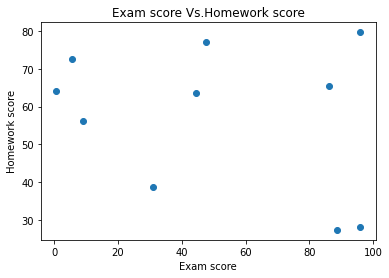

In [249]:
x=df.exam_score[20:30]
y=df.homework_score[20:30]

plt.xlabel("Exam score")
plt.ylabel("Homework score")
plt.title("Exam score Vs.Homework score")
plt.scatter(x,y)   #<- for find a relationship between two function, we will mostly use scatter plot